# Prototype: ypsilon

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `ALL` |
| *Dataset* | `CIC-DDoS-2019` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `25.000`|
| *Adversarial Attack* | `FGSM & C&W & JSMA & PGD & DeepFool & BIM & Boundary & HSJ` |
| *Attack Type* | `-` |
| *Explanations* | `SHAP` |
| *Detector* | `Detect Attacks and Misclassified Samples` |


---

## *Setup*

In [1]:
# To import modules from the functions directory
import sys
import os
# Get current directory of script or notebook
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

# Append parent directory (where "functions/" likely lives)
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)  # Make sure it's at the front

## Data Preprocessing

In [ ]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
sample_size = 25000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset(path='CIC-DDoS-2019/raw/')
print(dataset[' Label'].value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal
print(dataset.head())

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=1503)
print(f"Generate Features | Indices: {feature_df.index[:5]}... | Shape: {feature_df.shape}")
print(f"Generate Labels | Indices: {label_df.index[:5]}... | Shape: {label_df.shape}")
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
DrDoS_LDAP.csv


DrDoS_NTP.csv
TFTP.csv
DrDoS_UDP.csv
DrDoS_SSDP.csv
DrDoS_DNS.csv
DrDoS_MSSQL.csv
Syn.csv
DrDoS_SNMP.csv
UDPLag.csv
DrDoS_NetBIOS.csv
--- Removing NaN and Infinity values ---
Removing 168595 Rows with NaN values
Removing 161021 Rows with Infinity values
 Label
DrDoS_SNMP       994022
DrDoS_UDP        989019
DrDoS_NetBIOS    984911
DrDoS_SSDP       981106
DrDoS_NTP        980952
TFTP             979786
DrDoS_LDAP       978271
DrDoS_MSSQL      964358
DrDoS_DNS        955011
Syn              877707
UDP-lag          330079
BENIGN            25328
WebDDoS             439
Name: count, dtype: int64
   Unnamed: 0                               Flow ID   Source IP   Source Port  \
0       21010         172.16.0.5-192.168.50.1-0-0-0  172.16.0.5             0   
1       20932   172.16.0.5-192.168.50.1-900-1808-17  172.16.0.5           900   
2       27876  172.16.0.5-192.168.50.1-900-58766-17  172.16.0.5           900   
3       24270  172.16.0.5-192.168.50.1-900-35228-17  172.16.0.5           900

## Split Data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=302)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 70) (10000, 70) (40000, 2) (10000, 2)


## Create IDS

In [5]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# build ids and evaluate it on test data
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)
# store prediction from X_train
y_pred = ids.predict(ids_model, X_train, columns=y_train.columns)
print(f"Predictions on Normal Data | Indices: {y_pred.index[:5]}... | Shape: {y_pred.shape}")


Epoch 1/20


800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9638 - loss: 0.1455 - val_accuracy: 0.9984 - val_loss: 0.0079
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.9986 - loss: 0.0066 - val_accuracy: 0.9986 - val_loss: 0.0069
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.9986 - loss: 0.0057 - val_accuracy: 0.9986 - val_loss: 0.0063
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.9985 - loss: 0.0050 - val_accuracy: 0.9986 - val_loss: 0.0070
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.9986 - val_loss: 0.0068
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9984 - val_loss: 0.0067
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9984 - val_loss: 0.0071
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy:

2025-06-30 14:12:05.307169: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Global Accuracy: 99.89%
              precision    recall  f1-score   support

      ATTACK     0.9980    0.9998    0.9989      5047
      BENIGN     0.9998    0.9980    0.9989      4953

    accuracy                         0.9989     10000
   macro avg     0.9989    0.9989    0.9989     10000
weighted avg     0.9989    0.9989    0.9989     10000

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step
Predictions on Normal Data | Indices: Index([5736221, 1849287, 6102888, 7523701, 9053464], dtype='int64')... | Shape: (40000, 2)


## Generate Adversarial Attacks

In [6]:
import functions.attack_generator as ag
import importlib
import numpy as np
import pandas as pd
importlib.reload(ag)

# all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# Split the training data into normal and attack classes
attack_class_labels = ["cw", "fgsm", "jsma", "pgd", "bim", "deepfool", "boundary", "hsj"]
splits = ag.split_into_classes(X_train, y_train, "normal", attack_class_labels, split=0.5)
# splits = ag.split_into_attack_classes(X_train, y_train, class_labels)
X_normal, y_normal = splits["normal"]
X_cw, y_cw = splits["cw"]
X_fgsm, y_fgsm = splits["fgsm"]
X_jsma, y_jsma = splits["jsma"]
X_pgd, y_pgd = splits["pgd"]
X_bim, y_bim = splits["bim"]
X_deepfool, y_deepfool = splits["deepfool"]
X_boundary, y_boundary = splits["boundary"]
X_hsj, y_hsj = splits["hsj"]
print(f"Normal Data: {X_normal.shape} | CW Data: {X_cw.shape} | FGSM Data: {X_fgsm.shape} | JSMA Data: {X_jsma.shape} | PGD Data: {X_pgd.shape} | Boundary Data: {X_boundary.shape} | HSJ Data: {X_hsj.shape}")

# -- White-Box Attacks --
# generate attacks on the separated training data
X_adv_fgsm = ag.generate_fgsm_attacks(art_model, X_fgsm)
print(f"Create FGSM Adversarial Attack | Indices: {X_adv_fgsm.index[:5]}... | Shape: {X_adv_fgsm.shape}")
y_pred_adv_fgsm = ag.evaluate_art_model(art_model, X_adv_fgsm, y_fgsm)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_fgsm.index[:5]}... | Shape: {y_pred_adv_fgsm.shape}")
y_pred_fgsm = y_pred.loc[X_fgsm.index]

import multiprocessing
num_cores = multiprocessing.cpu_count()
X_adv_cw = ag.generate_cw_attacks_parallel(art_model, X_cw, num_cores=num_cores)
print(f"Create CW Adversarial Attack | Indices: {X_adv_cw.index[:5]}... | Shape: {X_adv_cw.shape}")
y_pred_adv_cw = ag.evaluate_art_model(art_model, X_adv_cw, y_cw)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_cw.index[:5]}... | Shape: {y_pred_adv_cw.shape}")
y_pred_cw = y_pred.loc[X_cw.index]

X_adv_jsma = ag.generate_jsma_attacks(art_model, X_jsma)
print(f"Create JSMA Adversarial Attack | Indices: {X_adv_jsma.index[:5]}... | Shape: {X_adv_jsma.shape}")
y_pred_adv_jsma = ag.evaluate_art_model(art_model, X_adv_jsma, y_jsma)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_jsma.index[:5]}... | Shape: {y_pred_adv_jsma.shape}")
y_pred_jsma = y_pred.loc[X_jsma.index]

X_adv_pgd = ag.generate_pgd_attacks(art_model, X_pgd)
print(f"Create PGD Adversarial Attack | Indices: {X_adv_pgd.index[:5]}... | Shape: {X_adv_pgd.shape}")
y_pred_adv_pgd = ag.evaluate_art_model(art_model, X_adv_pgd, y_pgd)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_pgd.index[:5]}... | Shape: {y_pred_adv_pgd.shape}")
y_pred_pgd = y_pred.loc[X_pgd.index]

X_adv_bim = ag.generate_bim_attacks(art_model, X_bim)
print(f"Create BIM Adversarial Attack | Indices: {X_adv_bim.index[:5]}... | Shape: {X_adv_bim.shape}")
y_pred_adv_bim = ag.evaluate_art_model(art_model, X_adv_bim, y_bim)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_bim.index[:5]}... | Shape: {y_pred_adv_bim.shape}")
y_pred_bim = y_pred.loc[X_bim.index]

X_adv_deepfool = ag.generate_deepfool_attacks(art_model, X_deepfool)
print(f"Create DeepFool Adversarial Attack | Indices: {X_adv_deepfool.index[:5]}... | Shape: {X_adv_deepfool.shape}")
y_pred_adv_deepfool = ag.evaluate_art_model(art_model, X_adv_deepfool, y_deepfool)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_deepfool.index[:5]}... | Shape: {y_pred_adv_deepfool.shape}")
y_pred_deepfool = y_pred.loc[X_deepfool.index]

# -- Black-Box Attacks --
X_adv_hsj = ag.generate_hsj_attacks_parallel(art_model, X_hsj, num_cores=num_cores-1) # TODO: use num_cores-1 to avoid memory error
print(f"Create HSJ Adversarial Attack | Indices: {X_adv_hsj.index[:5]}... | Shape: {X_adv_hsj.shape}")
y_pred_adv_hsj = ag.evaluate_art_model(art_model, X_adv_hsj, y_hsj)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_hsj.index[:5]}... | Shape: {y_pred_adv_hsj.shape}")
y_pred_hsj = y_pred.loc[X_hsj.index]

X_adv_boundary = ag.generate_boundary_attacks_parallel(art_model, X_boundary, num_cores=num_cores)
print(f"Create Boundary Adversarial Attack | Indices: {X_adv_boundary.index[:5]}... | Shape: {X_adv_boundary.shape}")
y_pred_adv_boundary = ag.evaluate_art_model(art_model, X_adv_boundary, y_boundary)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_boundary.index[:5]}... | Shape: {y_pred_adv_boundary.shape}")
y_pred_boundary = y_pred.loc[X_adv_boundary.index]

Normal Data: (20000, 70) | CW Data: (2500, 70) | FGSM Data: (2500, 70) | JSMA Data: (2500, 70) | PGD Data: (2500, 70) | Boundary Data: (2500, 70) | HSJ Data: (2500, 70)
Adversarial FGSM examples generated. Shape: (2500, 70)
Create FGSM Adversarial Attack | Indices: Index([10357469, 1013627, 3071392, 1007802, 6730701], dtype='int64')... | Shape: (2500, 70)
Accuracy: 23.44%
              precision    recall  f1-score   support

      ATTACK     0.2385    0.2537    0.2459      1230
      BENIGN     0.2299    0.2157    0.2226      1270

    accuracy                         0.2344      2500
   macro avg     0.2342    0.2347    0.2342      2500
weighted avg     0.2341    0.2344    0.2340      2500

Confusion Matrix: Positive == BENIGN
TN: 312, FP: 918, FN: 996, TP: 274
Predictions on Adversarial Attacks | Indices: Index([10357469, 1013627, 3071392, 1007802, 6730701], dtype='int64')... | Shape: (2500, 2)
Running attack using 24 CPU cores...

Process 48634 is generating adversarial examples fo

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/108 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/104 [00:00<?, ?it/s]

Create CW Adversarial Attack | Indices: Index([6102888, 1015270, 9050801, 9020151, 5796816], dtype='int64')... | Shape: (2500, 70)
Accuracy: 95.04%
              precision    recall  f1-score   support

      ATTACK     0.9138    0.9961    0.9532      1267
      BENIGN     0.9955    0.9035    0.9473      1233

    accuracy                         0.9504      2500
   macro avg     0.9547    0.9498    0.9502      2500
weighted avg     0.9541    0.9504    0.9503      2500

Confusion Matrix: Positive == BENIGN
TN: 1262, FP: 5, FN: 119, TP: 1114
Predictions on Adversarial Attacks | Indices: Index([6102888, 1015270, 9050801, 9020151, 5796816], dtype='int64')... | Shape: (2500, 2)


JSMA:   0%|          | 0/2500 [00:00<?, ?it/s]

Adversarial JSMA examples generated. Shape: (2500, 70)
Create JSMA Adversarial Attack | Indices: Index([1007193, 8013792, 5299937, 8748402, 1004898], dtype='int64')... | Shape: (2500, 70)
Accuracy: 0.16%
              precision    recall  f1-score   support

      ATTACK     0.0000    0.0000    0.0000      1247
      BENIGN     0.0032    0.0032    0.0032      1253

    accuracy                         0.0016      2500
   macro avg     0.0016    0.0016    0.0016      2500
weighted avg     0.0016    0.0016    0.0016      2500

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 1247, FN: 1249, TP: 4
Predictions on Adversarial Attacks | Indices: Index([1007193, 8013792, 5299937, 8748402, 1004898], dtype='int64')... | Shape: (2500, 2)


PGD - Batches: 0it [00:00, ?it/s]

2025-06-30 14:22:07.642070: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Adversarial PGD examples generated. Shape: (2500, 70)
Create PGD Adversarial Attack | Indices: Index([6492969, 5291628, 3381749, 2541671, 8887309], dtype='int64')... | Shape: (2500, 70)
Accuracy: 13.36%
              precision    recall  f1-score   support

      ATTACK     0.1152    0.1082    0.1116      1257
      BENIGN     0.1501    0.1593    0.1546      1243

    accuracy                         0.1336      2500
   macro avg     0.1326    0.1337    0.1331      2500
weighted avg     0.1325    0.1336    0.1329      2500

Confusion Matrix: Positive == BENIGN
TN: 136, FP: 1121, FN: 1045, TP: 198
Predictions on Adversarial Attacks | Indices: Index([6492969, 5291628, 3381749, 2541671, 8887309], dtype='int64')... | Shape: (2500, 2)


PGD - Batches: 0it [00:00, ?it/s]

2025-06-30 14:22:13.275554: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Adversarial BIM examples generated. Shape: (2500, 70)
Create BIM Adversarial Attack | Indices: Index([1000621, 1815008, 1011102, 7119241, 5166918], dtype='int64')... | Shape: (2500, 70)
Accuracy: 15.36%
              precision    recall  f1-score   support

      ATTACK     0.1207    0.1146    0.1176      1230
      BENIGN     0.1824    0.1913    0.1868      1270

    accuracy                         0.1536      2500
   macro avg     0.1516    0.1530    0.1522      2500
weighted avg     0.1521    0.1536    0.1527      2500

Confusion Matrix: Positive == BENIGN
TN: 141, FP: 1089, FN: 1027, TP: 243
Predictions on Adversarial Attacks | Indices: Index([1000621, 1815008, 1011102, 7119241, 5166918], dtype='int64')... | Shape: (2500, 2)


DeepFool:   0%|          | 0/2500 [00:00<?, ?it/s]

Adversarial DeepFool examples generated. Shape: (2500, 70)
Create DeepFool Adversarial Attack | Indices: Index([7800566, 1013259, 1015136, 1009012, 1001239], dtype='int64')... | Shape: (2500, 70)
Accuracy: 22.80%
              precision    recall  f1-score   support

      ATTACK     0.2402    0.2819    0.2594      1199
      BENIGN     0.2123    0.1783    0.1938      1301

    accuracy                         0.2280      2500
   macro avg     0.2262    0.2301    0.2266      2500
weighted avg     0.2257    0.2280    0.2253      2500

Confusion Matrix: Positive == BENIGN
TN: 338, FP: 861, FN: 1069, TP: 232
Predictions on Adversarial Attacks | Indices: Index([7800566, 1013259, 1015136, 1009012, 1001239], dtype='int64')... | Shape: (2500, 2)
Running attack using 23 CPU cores...

Process 64483 is generating adversarial examples for batch of size 108 
Process 64482 is generating adversarial examples for batch of size 108 
Process 64484 is generating adversarial examples for batch of size 10

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/124 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/108 [00:00<?, ?it/s]

Adversarial HopSkipJump examples generated. Shape: (2500, 70)
Create HSJ Adversarial Attack | Indices: Index([5741515, 1007053, 1178144, 1009559, 5010989], dtype='int64')... | Shape: (2500, 70)
Accuracy: 49.12%
              precision    recall  f1-score   support

      ATTACK     0.0000    0.0000    0.0000      1272
      BENIGN     0.4912    1.0000    0.6588      1228

    accuracy                         0.4912      2500
   macro avg     0.2456    0.5000    0.3294      2500
weighted avg     0.2413    0.4912    0.3236      2500

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 1272, FN: 0, TP: 1228
Predictions on Adversarial Attacks | Indices: Index([5741515, 1007053, 1178144, 1009559, 5010989], dtype='int64')... | Shape: (2500, 2)
Running attack using 24 CPU cores...

Process 79944 is generating adversarial examples for batch of size 104 
Process 79942 is generating adversarial examples for batch of size 104 
Process 79945 is generating adversarial examples for batch of size 104 
Pr

In [13]:
# store adversarial samples
path = "../../datasets/CIC-DDoS-2019/adversarial_samples/ypsilon-"
X_adv_fgsm.to_csv(path + "fgsm.csv", index=True)
X_adv_cw.to_csv(path + "cw.csv", index=True)
X_adv_jsma.to_csv(path + "jsma.csv", index=True)
X_adv_pgd.to_csv(path + "pgd.csv", index=True)
X_adv_bim.to_csv(path + "bim.csv", index=True)
X_adv_deepfool.to_csv(path + "deepfool.csv", index=True)
X_adv_hsj.to_csv(path + "hsj.csv", index=True)
X_adv_boundary.to_csv(path + "boundary.csv", index=True)

In [ ]:
# # load adversarial samples
# import pandas as pd
# path = "../../datasets/CICIDS2017/adversarial_samples/sigma-"
# X_adv_fgsm = pd.read_csv(path + "fgsm.csv", index_col=0)
# print(f"------- FGMS ATTACK -------")
# y_pred_adv_fgsm = ag.evaluate_art_model(art_model, X_adv_fgsm, y_fgsm)
# y_pred_fgsm = y_pred.loc[X_fgsm.index]
# X_adv_cw = pd.read_csv(path + "cw.csv", index_col=0)
# print(f"------- CW ATTACK -------")
# y_pred_adv_cw = ag.evaluate_art_model(art_model, X_adv_cw, y_cw)
# y_pred_cw = y_pred.loc[X_cw.index]
# X_adv_jsma = pd.read_csv(path + "jsma.csv", index_col=0)
# print(f"------- JSMA ATTACK -------")
# y_pred_adv_jsma = ag.evaluate_art_model(art_model, X_adv_jsma, y_jsma)
# y_pred_jsma = y_pred.loc[X_jsma.index]
# X_adv_pgd = pd.read_csv(path + "pgd.csv", index_col=0)
# print(f"------- PGD ATTACK -------")
# y_pred_adv_pgd = ag.evaluate_art_model(art_model, X_adv_pgd, y_pgd)
# y_pred_pgd = y_pred.loc[X_pgd.index]
# X_adv_bim = pd.read_csv(path + "bim.csv", index_col=0)
# print(f"------- BIM ATTACK -------")
# y_pred_adv_bim = ag.evaluate_art_model(art_model, X_adv_bim, y_bim)
# y_pred_bim = y_pred.loc[X_bim.index]
# X_adv_deepfool = pd.read_csv(path + "deepfool.csv", index_col=0)
# print(f"------- DEEPFOOL ATTACK -------")
# y_pred_adv_deepfool = ag.evaluate_art_model(art_model, X_adv_deepfool, y_deepfool)
# y_pred_deepfool = y_pred.loc[X_deepfool.index]
# X_adv_hsj = pd.read_csv(path + "hsj.csv", index_col=0)
# print(f"------- HSJ ATTACK -------")
# y_pred_adv_hsj = ag.evaluate_art_model(art_model, X_adv_hsj, y_hsj)
# y_pred_hsj = y_pred.loc[X_hsj.index]
# X_adv_boundary = pd.read_csv(path + "boundary.csv", index_col=0)
# print(f"------- BOUNDARY ATTACK -------")
# y_pred_adv_boundary = ag.evaluate_art_model(art_model, X_adv_boundary, y_boundary)
# y_pred_boundary = y_pred.loc[X_boundary.index]
# print(f"------- NO ATTACK -------")
# y_pred_no_attack = ag.evaluate_art_model(art_model, X_normal, y_normal)

------- FGMS ATTACK -------
Accuracy: 36.79%
              precision    recall  f1-score   support

      ATTACK     0.0614    0.0175    0.0273      7581
      BENIGN     0.4197    0.7260    0.5319      7419

    accuracy                         0.3679     15000
   macro avg     0.2405    0.3718    0.2796     15000
weighted avg     0.2386    0.3679    0.2769     15000

Confusion Matrix: Positive == BENIGN
TN: 133, FP: 7448, FN: 2033, TP: 5386
------- CW ATTACK -------
Accuracy: 69.83%
              precision    recall  f1-score   support

      ATTACK     0.7899    0.5317    0.6356      7423
      BENIGN     0.6525    0.8614    0.7425      7577

    accuracy                         0.6983     15000
   macro avg     0.7212    0.6966    0.6891     15000
weighted avg     0.7205    0.6983    0.6896     15000

Confusion Matrix: Positive == BENIGN
TN: 3947, FP: 3476, FN: 1050, TP: 6527
------- JSMA ATTACK -------
Accuracy: 1.65%
              precision    recall  f1-score   support

      AT

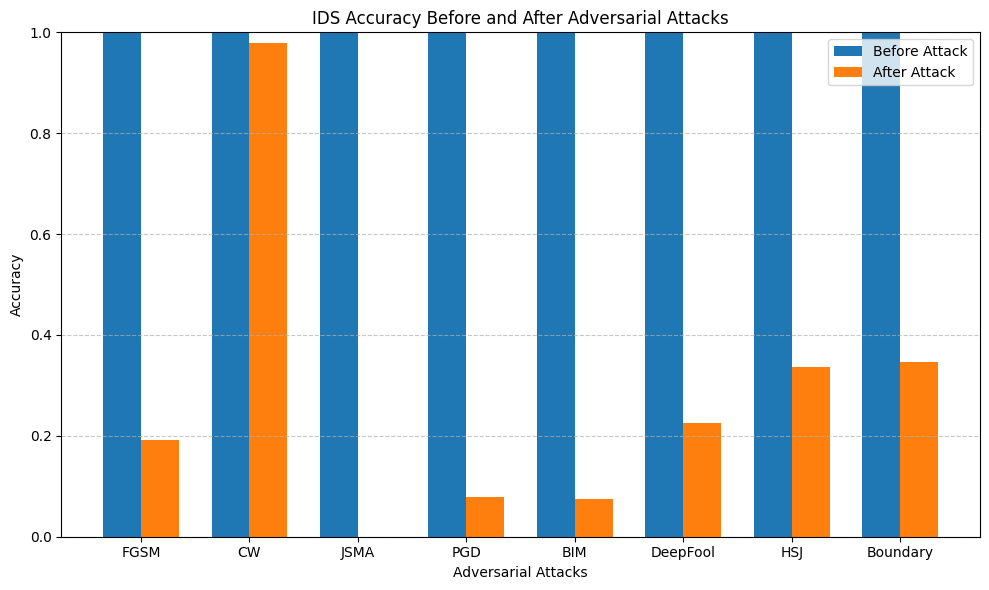

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_before_attack_fgsm = accuracy_score(y_fgsm, y_pred_fgsm)
accuracy_after_attack_fgsm = accuracy_score(y_fgsm, y_pred_adv_fgsm)
accuracy_before_attack_cw = accuracy_score(y_cw, y_pred_cw)
accuracy_after_attack_cw = accuracy_score(y_cw, y_pred_adv_cw)
accuracy_before_attack_jsma = accuracy_score(y_jsma, y_pred_jsma)
accuracy_after_attack_jsma = accuracy_score(y_jsma, y_pred_adv_jsma)
accuracy_before_attack_pgd = accuracy_score(y_pgd, y_pred_pgd)
accuracy_after_attack_pgd = accuracy_score(y_pgd, y_pred_adv_pgd)
accuracy_before_attack_bim = accuracy_score(y_bim, y_pred_bim)
accuracy_after_attack_bim = accuracy_score(y_bim, y_pred_adv_bim)
accuracy_before_attack_deepfool = accuracy_score(y_deepfool, y_pred_deepfool)
accuracy_after_attack_deepfool = accuracy_score(y_deepfool, y_pred_adv_deepfool)
accuracy_before_attack_hsj = accuracy_score(y_hsj, y_pred_hsj)
accuracy_after_attack_hsj = accuracy_score(y_hsj, y_pred_adv_hsj)
accuracy_before_attack_boundary = accuracy_score(y_boundary, y_pred_boundary)
accuracy_after_attack_boundary = accuracy_score(y_boundary, y_pred_adv_boundary)


import matplotlib.pyplot as plt
import numpy as np

# Names of the attacks
attacks = ['FGSM', 'CW', 'JSMA', 'PGD', 'BIM', 'DeepFool', 'HSJ', 'Boundary']

# Accuracy before and after attacks
accuracy_before = [
    accuracy_before_attack_fgsm,
    accuracy_before_attack_cw,
    accuracy_before_attack_jsma,
    accuracy_before_attack_pgd,
    accuracy_before_attack_bim,
    accuracy_before_attack_deepfool,
    accuracy_before_attack_hsj,
    accuracy_before_attack_boundary
]

accuracy_after = [
    accuracy_after_attack_fgsm,
    accuracy_after_attack_cw,
    accuracy_after_attack_jsma,
    accuracy_after_attack_pgd,
    accuracy_after_attack_bim,
    accuracy_after_attack_deepfool,
    accuracy_after_attack_hsj,
    accuracy_after_attack_boundary
]

# Bar positions
x = np.arange(len(attacks))
width = 0.35

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, accuracy_before, width, label='Before Attack')
plt.bar(x + width/2, accuracy_after, width, label='After Attack')

# Labels and formatting
plt.ylabel('Accuracy')
plt.xlabel('Adversarial Attacks')
plt.title('IDS Accuracy Before and After Adversarial Attacks')
plt.xticks(x, attacks)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


### Find correct classified samples from each Attack and plot difference

In [7]:
def get_correctly_benign_classified_indices(y_train, y_pred):
    benign_indices = y_train[y_train['BENIGN'] == 1].index
    benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
    correctly_benign_classified_indices = benign_indices.intersection(benign_adv_predicted_indices)
    return correctly_benign_classified_indices

def get_misclassified_as_benign_due_attack_indices(y_train, y_pred, y_pred_adv):
    attack_indices = y_train[y_train['ATTACK'] == 1].index
    attack_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
    benign_predicted_adversarial_indices = y_pred_adv[y_pred_adv['BENIGN'] == 1].index
    misclassified_as_benign_due_attack_indices = attack_indices.intersection(attack_adv_predicted_indices).intersection(benign_predicted_adversarial_indices)
    return misclassified_as_benign_due_attack_indices

def get_correctly_malicious_classified_indices(y_train, y_pred):
    malicious_indices = y_train[y_train['ATTACK'] == 1].index
    malicious_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
    correctly_malicious_classified_indices = malicious_indices.intersection(malicious_adv_predicted_indices)
    return correctly_malicious_classified_indices

def get_misclassified_as_malicious_due_attack_indices(y_train, y_pred, y_pred_adv):
    benign_indices = y_train[y_train['BENIGN'] == 1].index
    benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
    attack_predicted_adversarial_indices = y_pred_adv[y_pred_adv['ATTACK'] == 1].index
    misclassified_as_malicious_due_attack_indices = benign_indices.intersection(benign_adv_predicted_indices).intersection(attack_predicted_adversarial_indices)
    return misclassified_as_malicious_due_attack_indices

In [8]:
y_pred_normal = y_pred.loc[X_normal.index]
correctly_benign_classified_indices = get_correctly_benign_classified_indices(y_normal, y_pred_normal)
misclassified_as_benign_indices = get_misclassified_as_benign_due_attack_indices(y_normal, y_normal, y_pred_normal)
correctly_malicious_classified_indices = get_correctly_malicious_classified_indices(y_normal, y_pred_normal)
misclassified_as_malicious_due_attack_indices = get_misclassified_as_malicious_due_attack_indices(y_normal, y_normal, y_pred_normal)
print(f"------ Normal Data ------")
print(f"{len(correctly_benign_classified_indices)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_indices)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices) + len(misclassified_as_benign_indices) + len(correctly_malicious_classified_indices) + len(misclassified_as_malicious_due_attack_indices)}")

correctly_benign_classified_indices_fgsm = get_correctly_benign_classified_indices(y_fgsm, y_pred_adv_fgsm)
misclassified_as_benign_due_attack_indices_fgsm = get_misclassified_as_benign_due_attack_indices(y_fgsm, y_pred_fgsm, y_pred_adv_fgsm)
correctly_malicious_classified_indices_fgsm = get_correctly_malicious_classified_indices(y_fgsm, y_pred_adv_fgsm)
misclassified_as_malicious_due_attack_indices_fgsm = get_misclassified_as_malicious_due_attack_indices(y_fgsm, y_pred_fgsm, y_pred_adv_fgsm)
print(f"------ FGSM Data ------")
print(f"{len(correctly_benign_classified_indices_fgsm)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_fgsm)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_fgsm)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_fgsm)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_fgsm) + len(misclassified_as_benign_due_attack_indices_fgsm) + len(correctly_malicious_classified_indices_fgsm) + len(misclassified_as_malicious_due_attack_indices_fgsm)}")

correctly_benign_classified_indices_cw = get_correctly_benign_classified_indices(y_cw, y_pred_adv_cw)
misclassified_as_benign_due_attack_indices_cw = get_misclassified_as_benign_due_attack_indices(y_cw, y_pred_cw, y_pred_adv_cw)
correctly_malicious_classified_indices_cw = get_correctly_malicious_classified_indices(y_cw, y_pred_adv_cw)
misclassified_as_malicious_due_attack_indices_cw = get_misclassified_as_malicious_due_attack_indices(y_cw, y_pred_cw, y_pred_adv_cw)
print(f"------ CW Data ------")
print(f"{len(correctly_benign_classified_indices_cw)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_cw)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_cw)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_cw)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_cw) + len(misclassified_as_benign_due_attack_indices_cw) + len(correctly_malicious_classified_indices_cw) + len(misclassified_as_malicious_due_attack_indices_cw)}")

correctly_benign_classified_indices_jsma = get_correctly_benign_classified_indices(y_jsma, y_pred_adv_jsma)
misclassified_as_benign_due_attack_indices_jsma = get_misclassified_as_benign_due_attack_indices(y_jsma, y_pred_jsma, y_pred_adv_jsma)
correctly_malicious_classified_indices_jsma = get_correctly_malicious_classified_indices(y_jsma, y_pred_adv_jsma)
misclassified_as_malicious_due_attack_indices_jsma = get_misclassified_as_malicious_due_attack_indices(y_jsma, y_pred_jsma, y_pred_adv_jsma)
print(f"------ JSMA Data ------")
print(f"{len(correctly_benign_classified_indices_jsma)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_jsma)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_jsma)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_jsma)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_jsma) + len(misclassified_as_benign_due_attack_indices_jsma) + len(correctly_malicious_classified_indices_jsma) + len(misclassified_as_malicious_due_attack_indices_jsma)}")

correctly_benign_classified_indices_pgd = get_correctly_benign_classified_indices(y_pgd, y_pred_adv_pgd)
misclassified_as_benign_due_attack_indices_pgd = get_misclassified_as_benign_due_attack_indices(y_pgd, y_pred_pgd, y_pred_adv_pgd)
correctly_malicious_classified_indices_pgd = get_correctly_malicious_classified_indices(y_pgd, y_pred_adv_pgd)
misclassified_as_malicious_due_attack_indices_pgd = get_misclassified_as_malicious_due_attack_indices(y_pgd, y_pred_pgd, y_pred_adv_pgd)
print(f"------ PGD Data ------")
print(f"{len(correctly_benign_classified_indices_pgd)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_pgd)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_pgd)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_pgd)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_pgd) + len(misclassified_as_benign_due_attack_indices_pgd) + len(correctly_malicious_classified_indices_pgd) + len(misclassified_as_malicious_due_attack_indices_pgd)}")

correctly_benign_classified_indices_deepfool = get_correctly_benign_classified_indices(y_deepfool, y_pred_adv_deepfool)
misclassified_as_benign_due_attack_indices_deepfool = get_misclassified_as_benign_due_attack_indices(y_deepfool, y_pred_deepfool, y_pred_adv_deepfool)
correctly_malicious_classified_indices_deepfool = get_correctly_malicious_classified_indices(y_deepfool, y_pred_adv_deepfool)
misclassified_as_malicious_due_attack_indices_deepfool = get_misclassified_as_malicious_due_attack_indices(y_deepfool, y_pred_deepfool, y_pred_adv_deepfool)
print(f"------ DeepFool Data ------")
print(f"{len(correctly_benign_classified_indices_deepfool)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_deepfool)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_deepfool)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_deepfool)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_deepfool) + len(misclassified_as_benign_due_attack_indices_deepfool) + len(correctly_malicious_classified_indices_deepfool) + len(misclassified_as_malicious_due_attack_indices_deepfool)}")

correctly_benign_classified_indices_bim = get_correctly_benign_classified_indices(y_bim, y_pred_adv_bim)
misclassified_as_benign_due_attack_indices_bim = get_misclassified_as_benign_due_attack_indices(y_bim, y_pred_bim, y_pred_adv_bim)
correctly_malicious_classified_indices_bim = get_correctly_malicious_classified_indices(y_bim, y_pred_adv_bim)
misclassified_as_malicious_due_attack_indices_bim = get_misclassified_as_malicious_due_attack_indices(y_bim, y_pred_bim, y_pred_adv_bim)
print(f"------ BIM Data ------")
print(f"{len(correctly_benign_classified_indices_bim)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_bim)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_bim)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_bim)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_bim) + len(misclassified_as_benign_due_attack_indices_bim) + len(correctly_malicious_classified_indices_bim) + len(misclassified_as_malicious_due_attack_indices_bim)}")

correctly_benign_classified_indices_boundary = get_correctly_benign_classified_indices(y_boundary, y_pred_adv_boundary)
misclassified_as_benign_due_attack_indices_boundary = get_misclassified_as_benign_due_attack_indices(y_boundary, y_pred_boundary, y_pred_adv_boundary)
correctly_malicious_classified_indices_boundary = get_correctly_malicious_classified_indices(y_boundary, y_pred_adv_boundary)
misclassified_as_malicious_due_attack_indices_boundary = get_misclassified_as_malicious_due_attack_indices(y_boundary, y_pred_boundary, y_pred_adv_boundary)
print(f"------ Boundary Data ------")
print(f"{len(correctly_benign_classified_indices_boundary)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_boundary)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_boundary)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_boundary)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_boundary) + len(misclassified_as_benign_due_attack_indices_boundary) + len(correctly_malicious_classified_indices_boundary) + len(misclassified_as_malicious_due_attack_indices_boundary)}")

correctly_benign_classified_indices_hsj = get_correctly_benign_classified_indices(y_hsj, y_pred_adv_hsj)
misclassified_as_benign_due_attack_indices_hsj = get_misclassified_as_benign_due_attack_indices(y_hsj, y_pred_hsj, y_pred_adv_hsj)
correctly_malicious_classified_indices_hsj = get_correctly_malicious_classified_indices(y_hsj, y_pred_adv_hsj)
misclassified_as_malicious_due_attack_indices_hsj = get_misclassified_as_malicious_due_attack_indices(y_hsj, y_pred_hsj, y_pred_adv_hsj)
print(f"------ HSJ Data ------")
print(f"{len(correctly_benign_classified_indices_hsj)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_hsj)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_hsj)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_hsj)} | BENIGN sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_hsj) + len(misclassified_as_benign_due_attack_indices_hsj) + len(correctly_malicious_classified_indices_hsj) + len(misclassified_as_malicious_due_attack_indices_hsj)}")

------ Normal Data ------
9957 | Correctly classified as BENIGN from the IDS
1 | ATTACK sample misclassified as BENIGN from the IDS
10022 | Correctly classified as ATTACK from the IDS
20 | BENIGN sample misclassified as ATTACK from the IDS
Sum: 20000
------ FGSM Data ------
274 | Correctly classified as BENIGN from the IDS
918 | ATTACK sample misclassified as BENIGN from the IDS
312 | Correctly classified as ATTACK from the IDS
996 | BENIGN sample misclassified as ATTACK from the IDS
Sum: 2500
------ CW Data ------
1114 | Correctly classified as BENIGN from the IDS
5 | ATTACK sample misclassified as BENIGN from the IDS
1262 | Correctly classified as ATTACK from the IDS
119 | BENIGN sample misclassified as ATTACK from the IDS
Sum: 2500
------ JSMA Data ------
4 | Correctly classified as BENIGN from the IDS
1247 | ATTACK sample misclassified as BENIGN from the IDS
0 | Correctly classified as ATTACK from the IDS
1249 | BENIGN sample misclassified as ATTACK from the IDS
Sum: 2500
------ PG

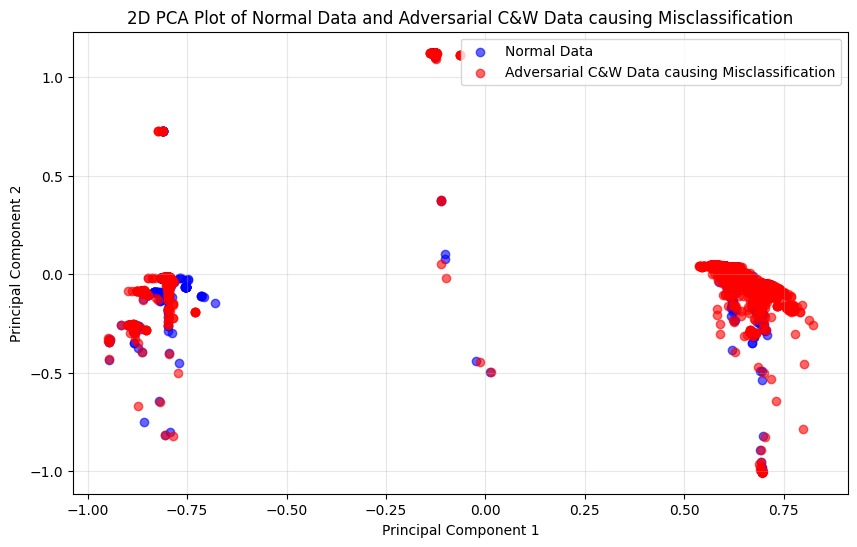

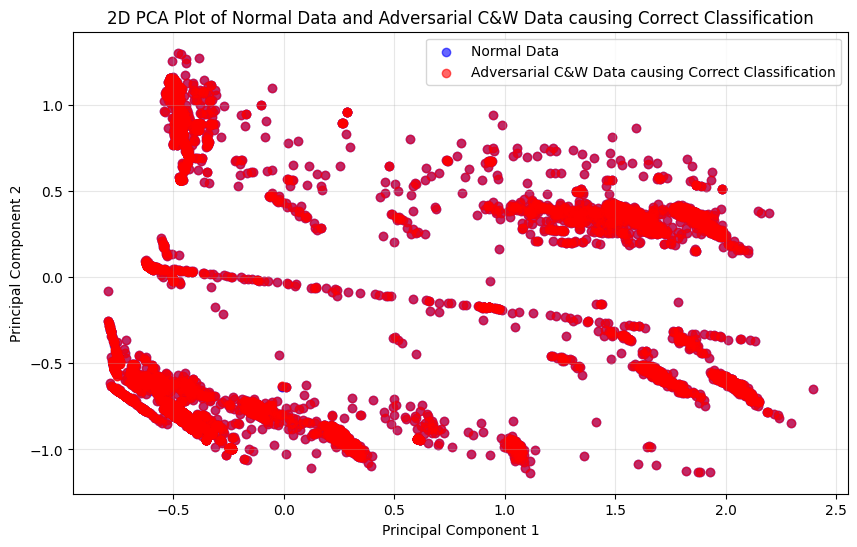

In [111]:
import functions.visualizer as visualizer
import importlib
importlib.reload(visualizer)

combined_misclassified_indices_cw = np.concatenate([misclassified_as_benign_due_attack_indices_cw, misclassified_as_malicious_due_attack_indices_cw])
combined_correctly_classified_indices_cw = np.concatenate([correctly_benign_classified_indices_cw, correctly_malicious_classified_indices_cw])
visualizer.visualize_data_distribution(X_cw.loc[combined_misclassified_indices_cw], 'Normal Data', X_adv_cw.loc[combined_misclassified_indices_cw], 'Adversarial C&W Data causing Misclassification')
visualizer.visualize_data_distribution(X_cw.loc[combined_correctly_classified_indices_cw], 'Normal Data', X_adv_cw.loc[combined_correctly_classified_indices_cw], 'Adversarial C&W Data causing Correct Classification')

## Explainer

In [9]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

explainer = exp.generate_shap_explainer(ids_model, X_train)

shap_values_df = exp.generate_shap_values(explainer, X_normal)
print(f"Generate Explanations | Indices: {shap_values_df.index[:5]}... | Shape: {shap_values_df.shape}")

shap_values_adv_df_fgsm = exp.generate_shap_values(explainer, X_adv_fgsm)
print(f"Generate FGSM Adversarial Explanations | Indices: {shap_values_adv_df_fgsm.index[:5]}... | Shape: {shap_values_adv_df_fgsm.shape}")

shap_values_adv_df_cw = exp.generate_shap_values(explainer, X_adv_cw)
print(f"Generate CW Adversarial Explanations | Indices: {shap_values_adv_df_cw.index[:5]}... | Shape: {shap_values_adv_df_cw.shape}")

shap_values_adv_df_jsma = exp.generate_shap_values(explainer, X_adv_jsma)
print(f"Generate JSMA Adversarial Explanations | Indices: {shap_values_adv_df_jsma.index[:5]}... | Shape: {shap_values_adv_df_jsma.shape}")

shap_values_adv_df_pgd = exp.generate_shap_values(explainer, X_adv_pgd)
print(f"Generate PGD Adversarial Explanations | Indices: {shap_values_adv_df_pgd.index[:5]}... | Shape: {shap_values_adv_df_pgd.shape}")

shap_values_adv_df_bim = exp.generate_shap_values(explainer, X_adv_bim)
print(f"Generate BIM Adversarial Explanations | Indices: {shap_values_adv_df_bim.index[:5]}... | Shape: {shap_values_adv_df_bim.shape}")

shap_values_adv_df_deepfool = exp.generate_shap_values(explainer, X_adv_deepfool)
print(f"Generate DeepFool Adversarial Explanations | Indices: {shap_values_adv_df_deepfool.index[:5]}... | Shape: {shap_values_adv_df_deepfool.shape}")

shap_values_adv_df_boundary = exp.generate_shap_values(explainer, X_adv_boundary)
print(f"Generate Boundary Adversarial Explanations | Indices: {shap_values_adv_df_boundary.index[:5]}... | Shape: {shap_values_adv_df_boundary.shape}")

shap_values_adv_df_hsj = exp.generate_shap_values(explainer, X_adv_hsj)
print(f"Generate HSJ Adversarial Explanations | Indices: {shap_values_adv_df_hsj.index[:5]}... | Shape: {shap_values_adv_df_hsj.shape}")

PermutationExplainer explainer: 20001it [08:39, 38.04it/s]                           


Generate Explanations | Indices: Index([7192857, 1001927, 1015180, 2148828, 5363931], dtype='int64')... | Shape: (20000, 70)


PermutationExplainer explainer: 2501it [01:13, 29.78it/s]                          


Generate FGSM Adversarial Explanations | Indices: Index([10357469, 1013627, 3071392, 1007802, 6730701], dtype='int64')... | Shape: (2500, 70)


PermutationExplainer explainer: 2501it [01:08, 31.58it/s]                          


Generate CW Adversarial Explanations | Indices: Index([6102888, 1015270, 9050801, 9020151, 5796816], dtype='int64')... | Shape: (2500, 70)


PermutationExplainer explainer: 2501it [01:07, 31.64it/s]                          


Generate JSMA Adversarial Explanations | Indices: Index([1007193, 8013792, 5299937, 8748402, 1004898], dtype='int64')... | Shape: (2500, 70)


PermutationExplainer explainer: 2501it [01:17, 27.83it/s]                          


Generate PGD Adversarial Explanations | Indices: Index([6492969, 5291628, 3381749, 2541671, 8887309], dtype='int64')... | Shape: (2500, 70)


PermutationExplainer explainer: 2501it [01:16, 28.10it/s]                          


Generate BIM Adversarial Explanations | Indices: Index([1000621, 1815008, 1011102, 7119241, 5166918], dtype='int64')... | Shape: (2500, 70)


PermutationExplainer explainer: 2501it [01:13, 29.36it/s]                          


Generate DeepFool Adversarial Explanations | Indices: Index([7800566, 1013259, 1015136, 1009012, 1001239], dtype='int64')... | Shape: (2500, 70)


PermutationExplainer explainer: 2501it [01:16, 28.43it/s]                          


Generate Boundary Adversarial Explanations | Indices: Index([6698337, 1013498, 6412521, 1012312, 1014705], dtype='int64')... | Shape: (2500, 70)


PermutationExplainer explainer: 2501it [01:15, 28.45it/s]                          

Generate HSJ Adversarial Explanations | Indices: Index([5741515, 1007053, 1178144, 1009559, 5010989], dtype='int64')... | Shape: (2500, 70)


In [12]:
# store shap values
class_name = 'ypsilon'
dataset_name = 'CIC-DDoS-2019'
shap_values_df.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values.csv", index=True)
shap_values_adv_df_fgsm.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_fgsm.csv", index=True)
shap_values_adv_df_cw.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_cw.csv", index=True)
shap_values_adv_df_jsma.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_jsma.csv", index=True)
shap_values_adv_df_pgd.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_pgd.csv", index=True)
shap_values_adv_df_bim.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_bim.csv", index=True)
shap_values_adv_df_deepfool.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_deepfool.csv", index=True)
shap_values_adv_df_boundary.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_boundary.csv", index=True)
shap_values_adv_df_hsj.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_hsj.csv", index=True)

In [ ]:
# # load shap values
# import pandas as pd
# shap_values_df = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values.csv", index_col=0)
# shap_values_adv_df_fgsm = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_fgsm.csv", index_col=0)
# shap_values_adv_df_cw = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_cw.csv", index_col=0)
# shap_values_adv_df_jsma = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_jsma.csv", index_col=0)
# shap_values_adv_df_pgd = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_pgd.csv", index_col=0)
# shap_values_adv_df_bim = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_bim.csv", index_col=0)
# shap_values_adv_df_deepfool = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_deepfool.csv", index_col=0)
# shap_values_adv_df_boundary = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_boundary.csv", index_col=0)
# shap_values_adv_df_hsj = pd.read_csv("../../datasets/CICIDS2017/shap_values/sigma-shap_values_adv_hsj.csv", index_col=0)
# import functions.explainer as exp
# import importlib
# importlib.reload(exp)
# explainer = exp.generate_shap_explainer(ids_model, X_train)

In [14]:
import pandas as pd
adv_concat_correctly_benign_classified_shaps = pd.concat([
    shap_values_adv_df_fgsm.loc[correctly_benign_classified_indices_fgsm],
    shap_values_adv_df_pgd.loc[correctly_benign_classified_indices_pgd],
    shap_values_adv_df_cw.loc[correctly_benign_classified_indices_cw],
    shap_values_adv_df_jsma.loc[correctly_benign_classified_indices_jsma],
    shap_values_adv_df_deepfool.loc[correctly_benign_classified_indices_deepfool],
    shap_values_adv_df_bim.loc[correctly_benign_classified_indices_bim],
    shap_values_adv_df_boundary.loc[correctly_benign_classified_indices_boundary],
    shap_values_adv_df_hsj.loc[correctly_benign_classified_indices_hsj],

    shap_values_adv_df_fgsm.loc[misclassified_as_malicious_due_attack_indices_fgsm], 
    shap_values_adv_df_pgd.loc[misclassified_as_malicious_due_attack_indices_pgd],
    shap_values_adv_df_cw.loc[misclassified_as_malicious_due_attack_indices_cw],
    shap_values_adv_df_jsma.loc[misclassified_as_malicious_due_attack_indices_jsma],
    shap_values_adv_df_deepfool.loc[misclassified_as_malicious_due_attack_indices_deepfool],
    shap_values_adv_df_bim.loc[misclassified_as_malicious_due_attack_indices_bim],
    shap_values_adv_df_boundary.loc[misclassified_as_malicious_due_attack_indices_boundary],
    shap_values_adv_df_hsj.loc[misclassified_as_malicious_due_attack_indices_hsj],

    ], axis=0)


adv_concat_correctly_malicious_classified_shaps = pd.concat([
    shap_values_adv_df_fgsm.loc[correctly_malicious_classified_indices_fgsm], 
    shap_values_adv_df_pgd.loc[correctly_malicious_classified_indices_pgd],
    shap_values_adv_df_cw.loc[correctly_malicious_classified_indices_cw],
    shap_values_adv_df_jsma.loc[correctly_malicious_classified_indices_jsma],
    shap_values_adv_df_deepfool.loc[correctly_malicious_classified_indices_deepfool],
    shap_values_adv_df_bim.loc[correctly_malicious_classified_indices_bim],
    shap_values_adv_df_boundary.loc[correctly_malicious_classified_indices_boundary],
    shap_values_adv_df_hsj.loc[correctly_malicious_classified_indices_hsj],

    shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 
    shap_values_adv_df_pgd.loc[misclassified_as_benign_due_attack_indices_pgd],
    shap_values_adv_df_cw.loc[misclassified_as_benign_due_attack_indices_cw],
    shap_values_adv_df_jsma.loc[misclassified_as_benign_due_attack_indices_jsma],
    shap_values_adv_df_deepfool.loc[misclassified_as_benign_due_attack_indices_deepfool],
    shap_values_adv_df_bim.loc[misclassified_as_benign_due_attack_indices_bim],
    shap_values_adv_df_boundary.loc[misclassified_as_benign_due_attack_indices_boundary],
    shap_values_adv_df_hsj.loc[misclassified_as_benign_due_attack_indices_hsj],

    ], axis=0)


concat_correct_benign_shaps = pd.concat([
    shap_values_df.loc[correctly_benign_classified_indices], 
    ], axis=0)

concat_correct_attack_shaps = pd.concat([
    shap_values_df.loc[correctly_malicious_classified_indices],
    ], axis=0)

print(f" ADV Correctly BENIGN : {adv_concat_correctly_benign_classified_shaps.shape} | ADV Correctly ATTACK: {adv_concat_correctly_malicious_classified_shaps.shape} | BENIGN: {concat_correct_benign_shaps.shape} | ATTACK: {concat_correct_attack_shaps.shape}")

 ADV Correctly BENIGN : (10070, 70) | ADV Correctly ATTACK: (9928, 70) | BENIGN: (9957, 70) | ATTACK: (10022, 70)


## Detector

In [15]:
import functions.detector as det
import importlib
importlib.reload(det)

# create dataframe
class_samples = {
    'ADV CORRECT ATTACK': adv_concat_correctly_malicious_classified_shaps,
    'ADV CORRECT BENIGN': adv_concat_correctly_benign_classified_shaps,
    'CORRECT BENIGN': concat_correct_benign_shaps, 
    'CORRECT ATTACK': concat_correct_attack_shaps,
}
X, y = det.build_detector_dataset(class_samples)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det, plot_train_performance=False)

# store detector
det.store(detector, 'ypsilon')

Class 'ADV CORRECT ATTACK' has 9928 samples.
Class 'ADV CORRECT BENIGN' has 10070 samples.
Class 'CORRECT BENIGN' has 9957 samples.
Class 'CORRECT ATTACK' has 10022 samples.
Generated dataset: X shape (39977, 70), y shape (39977, 4)
Epoch 1/20


2025-06-30 14:56:54.875097: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6862 - loss: 0.8695 - val_accuracy: 0.8624 - val_loss: 0.3430
Epoch 2/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8416 - loss: 0.3984 - val_accuracy: 0.8649 - val_loss: 0.3306
Epoch 3/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8530 - loss: 0.3744 - val_accuracy: 0.8655 - val_loss: 0.3282
Epoch 4/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8551 - loss: 0.3633 - val_accuracy: 0.8655 - val_loss: 0.3269
Epoch 5/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8554 - loss: 0.3591 - val_accuracy: 0.8662 - val_loss: 0.3261
Epoch 6/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8554 - loss: 0.3525 - val_accuracy: 0.8659 - val_loss: 0.3250
Epoch 7/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8574 - loss: 0.3479 - val_accuracy: 0.8659 - val_loss: 0.3252
Epoch 8/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8568 - loss: 0.3465 - val_accuracy: 0.8649 - val_

2025-06-30 14:57:12.792828: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [16]:
# Evaluate detector
y_pred_det = det.predict(detector, X_test_det, y.columns)
print(f"Predictions on Detector | Indices: {y_pred_det.index[:5]}... | Shape: {y_pred_det.shape}")

# Convert one-hot to class indices
y_true_indices = np.argmax(y_test_det, axis=1)
y_true_indices_pd = pd.Series(y_true_indices, index=y_test_det.index)
y_pred_indices = np.argmax(y_pred_det, axis=1)
y_pred_indices_pd = pd.Series(y_pred_indices, index=y_pred_det.index)
print(y_true_indices[:5], y_pred_indices[:5])

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Compute Accuracy
accuracy = accuracy_score(y_true_indices, y_pred_indices)
print(f"Overall Accuracy: {accuracy:.4f}")

# Compute Classification Report for overall classification
print("Classification Report (Overall):")
classification_report(y_true_indices, y_pred_indices, target_names=y.columns, zero_division=0, digits=4)

  1/125 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
Predictions on Detector | Indices: Index([1011872, 8541198, 1077002, 772263, 1002484], dtype='int64')... | Shape: (3998, 4)
[2 0 1 2 2] [2 0 1 2 2]
Overall Accuracy: 0.8659
Classification Report (Overall):


2025-06-30 14:57:21.178129: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


'                    precision    recall  f1-score   support\n\nADV CORRECT ATTACK     0.9989    0.8583    0.9232      1023\nADV CORRECT BENIGN     0.9968    0.6133    0.7594      1006\n    CORRECT BENIGN     0.7220    0.9980    0.8379      1002\n    CORRECT ATTACK     0.8673    1.0000    0.9289       967\n\n          accuracy                         0.8659      3998\n         macro avg     0.8962    0.8674    0.8624      3998\n      weighted avg     0.8971    0.8659    0.8620      3998\n'

---
## Manual Evaluation
We perform the whole two-stages approach on new unseen data and evaluate the following scores:
- Recall
- Precision
- Accuracy
- F1 Score

In [17]:
y_eval, X_eval, _ = dp.sample_balanced_data(y_test, X_test, sample_size=1000, random_state=3001)
y_eval.value_counts()

--- Sampling balanced data ---
Sample to shape: (2000, 70)


BENIGN  ATTACK
False   True      1000
True    False     1000
Name: count, dtype: int64

In [18]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# dataset
# exclude previously used samples
dataset_eval_excluded = dataset.drop(index=used_indices) # TODO: problem -> we already used all the benign samples

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=1000, random_sample_state=3001)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

-- Preprocessing data --
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Sampling balanced data ---
Sample to shape: (2000, 70)
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([1012259, 1012769, 1011002, 5010681, 1004176], dtype='int64')... | Shape: (2000, 70)
Generate Labels | Indices: Index([1012259, 1012769, 1011002, 5010681, 1004176], dtype='int64')... | Shape: (2000, 2)
BENIGN  ATTACK
False   True      1000
True    False     1000
Name: count, dtype: int64


### Just for Import

In [6]:
import functions.detector as det
import functions.explainer as exp
import functions.attack_generator as ag
importlib.reload(det)
import numpy as np
detector = det.load('ypsilon')

explainer = exp.generate_shap_explainer(ids_model, X_train)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

import multiprocessing
num_cores = multiprocessing.cpu_count()

### Normal IDS Prediction

In [19]:
y_pred_norm = ids.predict(ids_model, X_eval, y_eval.columns)
ids.evaluate_model(y_pred_norm, y_eval)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
Global Accuracy: 99.80%
              precision    recall  f1-score   support

      ATTACK     0.9960    1.0000    0.9980      1000
      BENIGN     1.0000    0.9960    0.9980      1000

    accuracy                         0.9980      2000
   macro avg     0.9980    0.9980    0.9980      2000
weighted avg     0.9980    0.9980    0.9980      2000



2025-06-30 14:57:54.760171: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [ ]:
importlib.reload(ag)

import multiprocessing
num_cores = multiprocessing.cpu_count()
X_adv_eval = ag.generate_boundary_attacks_parallel(art_model, X_eval, num_cores=num_cores)
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Running attack using 24 CPU cores...

Process 97305 is generating adversarial examples for batch of size 83 
Process 97304 is generating adversarial examples for batch of size 83 
Process 97303 is generating adversarial examples for batch of size 83 
Process 97306 is generating adversarial examples for batch of size 83 
Process 97308 is generating adversarial examples for batch of size 83 
Process 97307 is generating adversarial examples for batch of size 83 
Process 97309 is generating adversarial examples for batch of size 83 
Process 97310 is generating adversarial examples for batch of size 83 
Process 97311 is generating adversarial examples for batch of size 83 
Process 97313 is generating adversarial examples for batch of size 83 
Process 97315 is generating adversarial examples for batch of size 83 
Process 97312 is generating adversarial examples for batch of size 83 
Process 97314 is generating adversarial examples for batch of size 83 
Process 97317 is generating adversarial

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/83 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/91 [00:00<?, ?it/s]

Adversarial HopSkipJump examples generated. Shape: (2000, 70)
Create Adversarial Attack | Indices: Index([1012259, 1012769, 1011002, 5010681, 1004176], dtype='int64')... | Shape: (2000, 70)
Accuracy: 50.00%
              precision    recall  f1-score   support

      ATTACK     0.0000    0.0000    0.0000      1000
      BENIGN     0.5000    1.0000    0.6667      1000

    accuracy                         0.5000      2000
   macro avg     0.2500    0.5000    0.3333      2000
weighted avg     0.2500    0.5000    0.3333      2000

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 1000, FN: 0, TP: 1000
Predictions on Adversarial Attacks | Indices: Index([1012259, 1012769, 1011002, 5010681, 1004176], dtype='int64')... | Shape: (2000, 2)


In [ ]:
importlib.reload(exp)
X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

PermutationExplainer explainer:  73%|███████▎  | 1459/2000 [00:42<00:17, 30.52it/s]

In [ ]:
# # normal shap values
# y_pred_adv_eval = ag.evaluate_art_model(art_model, X_eval, y_eval)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

# X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_eval)

# print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

In [ ]:
importlib.reload(det)
benign_eval_idx = y_eval[y_eval['BENIGN'] == 1].index
attack_eval_idx = y_eval[y_eval['ATTACK'] == 1].index

pred_benign_idx = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
pred_attack_idx = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index

# predict
columns = ['ADV CORRECT ATTACK', 'ADV CORRECT BENIGN', 'CORRECT BENIGN', 'CORRECT ATTACK']
y_pred_eval_detector = det.predict(detector, X_eval_adv_shap_values_df, columns)
# y_pred_eval_detector = det.predict(detector, X_adv_eval, columns)


# correctly_classified_det_idx = y_pred_eval_detector[y_pred_eval_detector['BENIGN'] == 1].index
# misclassified_det_idx = y_pred_eval_detector[y_pred_eval_detector['ATTACK'] == 1].index

 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

2025-06-30 15:20:43.950456: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step


In [ ]:
pred_class_0 = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT BENIGN'] == 1].index 
pred_class_1 = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT ATTACK'] == 1].index
pred_class_2 = y_pred_eval_detector[y_pred_eval_detector['CORRECT ATTACK'] == 1].index
pred_class_3 = y_pred_eval_detector[y_pred_eval_detector['CORRECT BENIGN'] == 1].index
print(f"Predicted Class 0: {len(pred_class_0)}")
print(f"Predicted Class 1: {len(pred_class_1)}")
print(f"Predicted Class 2: {len(pred_class_2)}")
print(f"Predicted Class 3: {len(pred_class_3)}")
print("All Predicted Classes: ", len(pred_class_0) + len(pred_class_1) + len(pred_class_2) + len(pred_class_3))

Predicted Class 0: 804
Predicted Class 1: 724
Predicted Class 2: 281
Predicted Class 3: 191
All Predicted Classes:  2000


In [ ]:
# TODO: define correct and misclassified classes for each attack:
benign_pred_idx = y_pred_eval_detector.loc[pred_class_0].index # Detector classifies 'BENIGN' samples as correct 'BENIGN'
attack_pred_idx = y_pred_eval_detector.loc[pred_class_1].index # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'

# generate bening_pred_idx: pred_class_0 and 3 are benign
benign_pred_idx = np.concatenate([y_pred_eval_detector.loc[pred_class_0].index, y_pred_eval_detector.loc[pred_class_3].index]) # Detector classifies 'BENIGN' samples as correct 'BENIGN'
# generate attack_pred_idx: pred_class_1 and 2 are attack
attack_pred_idx = np.concatenate([y_pred_eval_detector.loc[pred_class_1].index, y_pred_eval_detector.loc[pred_class_2].index]) # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'

# After Detector Stage
TP = len(benign_eval_idx.intersection(benign_pred_idx)) # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"Detector classifies 'BENIGN' samples as correct 'BENIGN': {TP}")
FP = len(attack_eval_idx.intersection(benign_pred_idx)) # Detector classifies 'ATTACK' samples as correct 'BENIGN'
print(f"Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': {FP}")

TN = len(attack_eval_idx.intersection(attack_pred_idx)) # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': {TN}")
FN = len(benign_eval_idx.intersection(attack_pred_idx)) # Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': {FN}")

print(f"TP: {TP}")
print(f"FP: {FP}")
print(f"TN: {TN}")
print(f"FN: {FN}")
print(f"Sum: {TP + FP + TN + FN}")

Detector classifies 'BENIGN' samples as correct 'BENIGN': 994
Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': 1
Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': 999
Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': 6
TP: 994
FP: 1
TN: 999
FN: 6
Sum: 2000


In [ ]:
from sklearn.metrics import classification_report

print(f"Global Accuracy: {(TP + TN) / (TP + FP + TN + FN) * 100:.2f}%")

# Construct a fake y_true and y_pred to match sklearn's classification_report format
y_true = np.array([1] * TP + [0] * TN + [1] * FN + [0] * FP)  # True labels
y_pred = np.array([1] * TP + [0] * TN + [0] * FN + [1] * FP)  # Predicted labels

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['ATTACK', 'BENIGN'], digits=4) # reverse labels because classification_report assumes first label is 0
print(report)

print(f"True Negative Rate: {TN/(TN+FP)*100:.2f}%")
print(f"False Positive Rate: {FP/(TN+FP)*100:.2f}%")
print(f"True Positive Rate: {TP/(TP+FN)*100:.2f}%")
print(f"False Negative Rate: {FN/(TP+FN)*100:.2f}%")

Global Accuracy: 99.65%
              precision    recall  f1-score   support

      ATTACK     0.9940    0.9990    0.9965      1000
      BENIGN     0.9990    0.9940    0.9965      1000

    accuracy                         0.9965      2000
   macro avg     0.9965    0.9965    0.9965      2000
weighted avg     0.9965    0.9965    0.9965      2000

True Negative Rate: 99.90%
False Positive Rate: 0.10%
True Positive Rate: 99.40%
False Negative Rate: 0.60%


---
### Attack Success Rate - Adversarial Attack Misclassify IDS

#### ASR with Defense

In [86]:
# how many samples gets misclassified?
print(f" {len(pred_class_2)} ATTACK")
print(f" {len(pred_class_3)} BENIGN")

misclassified_benign = pred_class_2.intersection(benign_eval_idx)
misclassified_malicious = pred_class_3.intersection(attack_eval_idx)

asr = (len(misclassified_benign) + len(misclassified_malicious)) / len(X_eval)
print(f"Attack Success Rate: {asr:.4f}")

eamr = 1 - asr
print(f"Effective Adversarial Mitigation Rate: {eamr:.4f}")

 2 ATTACK
 990 BENIGN
Attack Success Rate: 0.0010
Effective Adversarial Mitigation Rate: 0.9990


#### ASR without Defense

In [ ]:

asr_normal_benign_class = y_pred_adv_eval[y_pred_adv_eval['BENIGN']].index
asr_normal_attack_class = y_pred_adv_eval[y_pred_adv_eval['ATTACK']].index

misclassified_benign_normal = asr_normal_benign_class.intersection(attack_eval_idx)
misclassified_attack_normal = asr_normal_attack_class.intersection(benign_eval_idx)
print(f"Misclassified Benign Normal Samples: {len(misclassified_benign_normal)}")
print(f"Misclassified Attack Normal Samples: {len(misclassified_attack_normal)}")
asr_normal = (len(misclassified_benign_normal) + len(misclassified_attack_normal)) / len(X_eval)
print(f"Attack Success Rate on Normal Data: {asr_normal:.4f}")

Misclassified Benign Normal Samples: 720
Misclassified Attack Normal Samples: 788
Attack Success Rate on Normal Data: 0.7540
